In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import r2_score  
from sklearn.metrics import mean_squared_error
from math import sqrt  
import warnings
warnings.filterwarnings('ignore')

insurance = pd.read_csv("insurance.csv")

insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [101]:
insurance.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [102]:
print ("Rows     : " , insurance.shape[0])
print ("Columns  : " , insurance.shape[1])
print ("\nFeatures : \n" , insurance.columns.tolist())
print ("\nMissing values :  ", insurance.isnull().sum().values.sum())
print ("\nUnique values :  \n",insurance.nunique())

Rows     :  1338
Columns  :  7

Features : 
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']

Missing values :   0

Unique values :  
 age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64


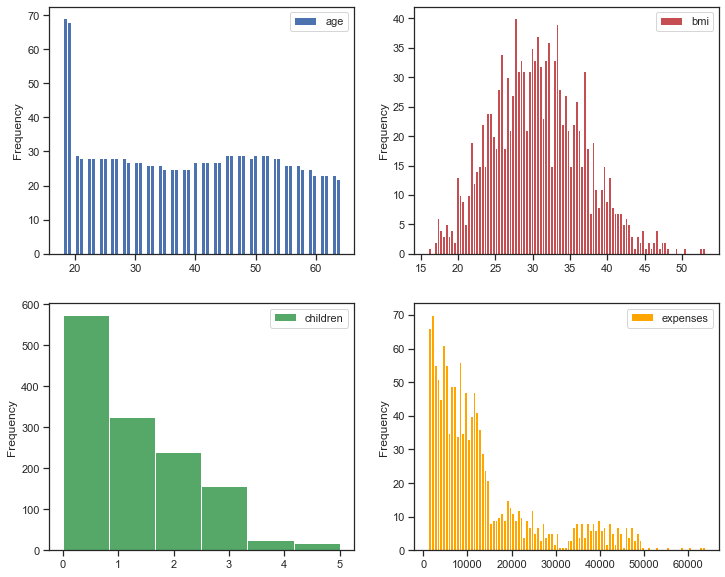

In [103]:
# Data exploration

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
insurance.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
insurance.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
insurance.plot(kind="hist", y="children", bins=6, color="g", ax=axes[1][0])
insurance.plot(kind="hist", y="expenses", bins=100, color="orange", ax=axes[1][1])
plt.show()

In [104]:
insurance.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


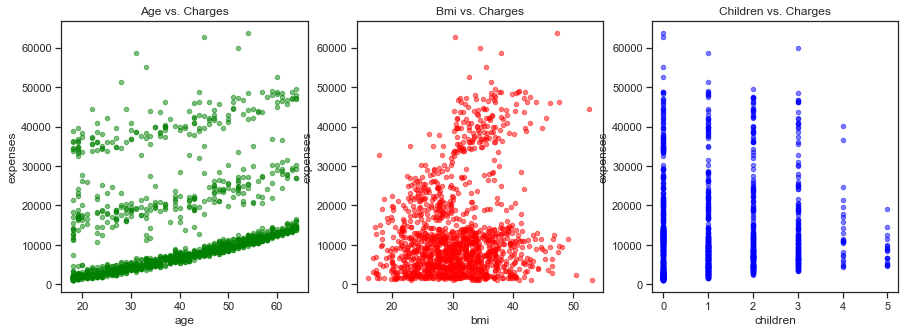

In [105]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
insurance.plot(kind='scatter', x='age', y='expenses', alpha=0.5, color='green', ax=axes[0], title="Age vs. Charges")
insurance.plot(kind='scatter', x='bmi', y='expenses', alpha=0.5, color='red', ax=axes[1], title="Bmi vs. Charges")
insurance.plot(kind='scatter', x='children', y='expenses', alpha=0.5, color='blue', ax=axes[2], title="Children vs. Charges")
plt.show()

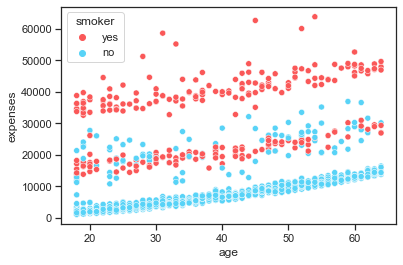

In [106]:
pal = ["#FA5858", "#58D3F7"]
sns.scatterplot(x="age", y="expenses", data=insurance, palette=pal, hue='smoker')
plt.show()

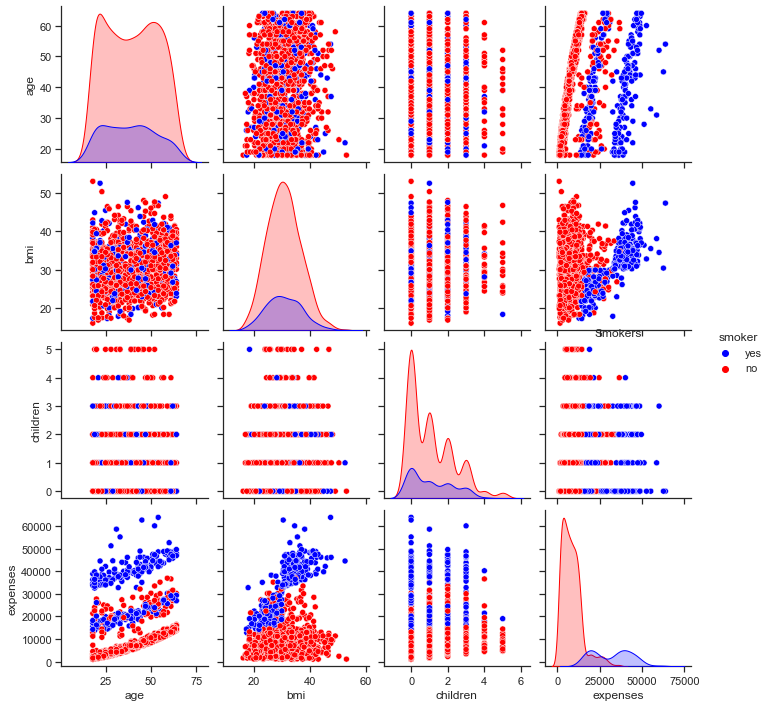

In [107]:
sns.set(style="ticks")
pal = ["blue", "red"]

sns.pairplot(insurance, hue="smoker", palette=pal)
plt.title("Smokers")
plt.show()

In [108]:
insurance['sex'].unique()

array(['female', 'male'], dtype=object)

In [109]:
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [110]:
insurance.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [111]:
# Label or integer encoding is possible 

#insurance['sex'] = insurance['sex'].map(lambda s :1  if s == 'female' else 0)
#insurance['smoker'] = insurance['smoker'].map(lambda s :1  if s == 'yes' else 0)

#insurance.head()

In [112]:
# One hot encoding

cat_col=['smoker','region','sex']
num_col=[i for i in insurance.columns if i not in cat_col]
num_col

['age', 'bmi', 'children', 'expenses']

In [113]:
one_hot=pd.get_dummies(insurance[cat_col],drop_first=True)
insurance=pd.concat([insurance[num_col],one_hot],axis=1)
insurance.head(10)

,age,bmi,children,expenses,smoker_yes,region_northwest,region_southeast,region_southwest,sex_male
0,19,27.9,0,16884.92,1,0,0,1,0
1,18,33.8,1,1725.55,0,0,1,0,1
2,28,33.0,3,4449.46,0,0,1,0,1
3,33,22.7,0,21984.47,0,1,0,0,1
4,32,28.9,0,3866.86,0,1,0,0,1
5,31,25.7,0,3756.62,0,0,1,0,0
6,46,33.4,1,8240.59,0,0,1,0,0
7,37,27.7,3,7281.51,0,1,0,0,0
8,37,29.8,2,6406.41,0,0,0,0,1
9,60,25.8,0,28923.14,0,1,0,0,0


In [114]:
X = insurance.drop(['expenses'], axis = 1)
y = insurance.expenses

In [115]:
# Train test split

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [116]:
pd.DataFrame(X_train)

,age,bmi,children,smoker_yes,region_northwest,region_southeast,region_southwest,sex_male
621,37,34.1,4,1,0,0,1,1
194,18,34.4,0,0,0,1,0,1
240,23,36.7,2,1,0,0,0,0
1168,32,35.2,2,0,0,0,1,1
1192,58,32.4,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
763,27,26.0,0,0,0,0,0,1
835,42,36.0,2,0,0,1,0,1
1216,40,25.1,0,0,0,1,0,1
559,19,35.5,0,0,1,0,0,1


In [118]:
pd.DataFrame(X_test)

,age,bmi,children,smoker_yes,region_northwest,region_southeast,region_southwest,sex_male
578,52,30.2,1,0,0,0,1,1
610,47,29.4,1,0,0,1,0,0
569,48,40.6,2,1,1,0,0,1
1034,61,38.4,0,0,1,0,0,1
198,51,18.1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
1084,62,30.5,2,0,1,0,0,0
726,41,28.4,1,0,1,0,0,1
1132,57,40.3,0,0,0,0,0,1
725,30,39.1,3,1,0,1,0,0


In [119]:
std_age = StandardScaler()
X_train.age = std_age.fit_transform(np.array(X_train.age).reshape(-1,1))

In [120]:
X_test.age =  std_age.transform(np.array(X_test.age).reshape(-1,1))

In [122]:
file = open('age_scale.pkl','wb')
pickle.dump(std_age,file)
file.close()

In [123]:
std_bmi = StandardScaler()
X_train.bmi = std_bmi.fit_transform(np.array(X_train.bmi).reshape(-1,1))

In [124]:
X_test.bmi = std_bmi.transform(np.array(X_test.bmi).reshape(-1,1))

In [125]:
file = open('bmi_scale.pkl','wb')
pickle.dump(std_bmi,file)
file.close()

In [126]:
std_children = StandardScaler()
X_train.children = std_children.fit_transform(np.array(X_train.children).reshape(-1,1))

In [127]:
X_test.children = std_children.transform(np.array(X_test.children).reshape(-1,1))

In [128]:
file = open('children_scale.pkl','wb')
pickle.dump(std_children,file)
file.close()

In [129]:
std_smoker = StandardScaler()
X_train.smoker_yes = std_smoker.fit_transform(np.array(X_train.smoker_yes).reshape(-1,1))

In [130]:
X_test.smoker_yes = std_smoker.transform(np.array(X_test.smoker_yes).reshape(-1,1))

In [131]:
file = open('smoker_scale.pkl','wb')
pickle.dump(std_smoker,file)
file.close()

In [132]:
std_regionNW = StandardScaler()
X_train.region_northwest = std_regionNW.fit_transform(np.array(X_train.region_northwest).reshape(-1,1))

In [133]:
X_test.region_northwest = std_regionNW.transform(np.array(X_test.region_northwest).reshape(-1,1))

In [134]:
file = open('regionNorthWest_scale.pkl','wb')
pickle.dump(std_regionNW,file)
file.close()

In [135]:
std_regionSW = StandardScaler()
X_train.region_southwest = std_regionSW.fit_transform(np.array(X_train.region_southwest).reshape(-1,1))

In [136]:
X_test.region_southwest = std_regionSW.transform(np.array(X_test.region_southwest).reshape(-1,1))

In [137]:
file = open('regionSouthWest_scale.pkl','wb')
pickle.dump(std_regionSW,file)
file.close()

In [138]:
std_regionSE = StandardScaler()
X_train.region_southeast = std_regionSE.fit_transform(np.array(X_train.region_southeast).reshape(-1,1))

In [139]:
X_test.region_southeast = std_regionSE.transform(np.array(X_test.region_southeast).reshape(-1,1))

In [140]:
file = open('regionSouthEast_scale.pkl','wb')
pickle.dump(std_regionSE,file)
file.close()

In [141]:
std_sex = StandardScaler()
X_train.sex_male = std_sex.fit_transform(np.array(X_train.sex_male).reshape(-1,1))

In [142]:
X_test.sex_male = std_sex.transform(np.array(X_test.sex_male).reshape(-1,1))

In [143]:
file = open('sex_scale.pkl','wb')
pickle.dump(std_sex,file)
file.close()

In [144]:
# #Standardisation the data is also an option
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)


In [145]:
X_train.head(1)

,age,bmi,children,smoker_yes,region_northwest,region_southeast,region_southwest,sex_male
621,-0.148533,0.54494,2.413948,1.971255,-0.55792,-0.615521,1.708629,1.015067


In [146]:
X_test.head(1)

,age,bmi,children,smoker_yes,region_northwest,region_southeast,region_southwest,sex_male
578,0.916684,-0.085738,-0.065659,-0.507291,-0.55792,-0.615521,1.708629,1.015067


In [147]:
std_age.transform(np.array(37).reshape(-1,1))     

array([[-0.14853305]])

In [148]:
std_age.transform(np.array(52).reshape(-1,1))     

array([[0.91668389]])

## Linear Regession

In [52]:
from sklearn.linear_model import LinearRegression  # Import Linear Regression model

multiple_linear_reg = LinearRegression(fit_intercept=False)  # Create a instance for Linear Regression model
multiple_linear_reg.fit(X_train, y_train)  # Fit data to the model

LinearRegression(fit_intercept=False)

In [53]:
## Accuracy with vanilla multiple linear regression

# Prediction with training dataset:
y_pred_MLR_train = multiple_linear_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_MLR_test = multiple_linear_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

# Find testing accuracy for this model:
accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

# Find RMSE for training data:
RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

# Find RMSE for testing data:
RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_MLR = cross_val_predict(multiple_linear_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_MLR = r2_score(y, y_pred_cv_MLR)
print("Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model: ", accuracy_cv_MLR)

Training Accuracy for Multiple Linear Regression Model:  -0.47853008120571827
Testing Accuracy for Multiple Linear Regression Model:  -0.3300569682649874
RMSE for Training Data:  14559.229579026976
RMSE for Testing Data:  14548.261617299797
Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model:  0.7202867211723507


## Linear Regression with Polynomial Features

In [54]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=2)  # Create a PolynomialFeatures instance in degree 3
x_train_poly = polynomial_features.fit_transform(X_train)  # Fit and transform the training data to polynomial
x_test_poly = polynomial_features.fit_transform(X_test)  # Fit and transform the testing data to polynomial

polynomial_reg = LinearRegression(fit_intercept=False)  # Create a instance for Linear Regression model
polynomial_reg.fit(x_train_poly, y_train)  # Fit data to the model

LinearRegression(fit_intercept=False)

In [55]:
x_train_poly.shape

(1070, 45)

In [56]:
## Checking accuracy with Linear model with polynomial features

# Prediction with training dataset:
y_pred_PR_train = polynomial_reg.predict(x_train_poly)

# Prediction with testing dataset:
y_pred_PR_test = polynomial_reg.predict(x_test_poly)

# Find training accuracy for this model:
accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Accuracy for Polynomial Regression Model: ", accuracy_PR_train)

# Find testing accuracy for this model:
accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Accuracy for Polynomial Regression Model: ", accuracy_PR_test)

# Find RMSE for training data:
RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

# Find RMSE for testing data:
RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X), y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 10-Fold Cross Predicted Polynomial Regression Model: ", accuracy_cv_PR)

Training Accuracy for Polynomial Regression Model:  0.8374241430113881
Testing Accuracy for Polynomial Regression Model:  0.8802979087211543
RMSE for Training Data:  4827.82298329519
RMSE for Testing Data:  4364.423140645322
Accuracy for 10-Fold Cross Predicted Polynomial Regression Model:  0.837899583778298


In [57]:
file = open('linear_polynomial.pkl','wb')
pickle.dump(polynomial_reg, file)
file.close()

## Decision Trees

In [58]:
from sklearn.tree import DecisionTreeRegressor  # Import Decision Tree Regression model

decision_tree_reg = DecisionTreeRegressor(max_depth=4, random_state=13)  # Create a instance for Decision Tree Regression model
decision_tree_reg.fit(X_train, y_train)  # Fit data to the model

DecisionTreeRegressor(max_depth=4, random_state=13)

In [59]:
## Checking accuracy with Decision trees 

# Prediction with training dataset:
y_pred_DTR_train = decision_tree_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_DTR_test = decision_tree_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_DTR_train)

# Find testing accuracy for this model:
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test)

# Find RMSE for training data:
RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE for Training Data: ", RMSE_DTR_train)

# Find RMSE for testing data:
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE for Testing Data: ", RMSE_DTR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_DTR = cross_val_predict(decision_tree_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = r2_score(y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DTR)

Training Accuracy for Decision Tree Regression Model:  0.857987286659203
Testing Accuracy for Decision Tree Regression Model:  0.8802320436057114
RMSE for Training Data:  4512.185281427831
RMSE for Testing Data:  4365.623719926021
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.8497702713440254


In [60]:
## Hyperparameter tuning in Decision trees

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

params = { 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeRegressor(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeRegressor(**best_params)
tree_clf.fit(X_train, y_train)

## Checking accuracy with Tuned RFs## Checking accuracy with Tuned RFs

Fitting 3 folds for each of 2166 candidates, totalling 6498 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 5128 tasks      | elapsed:    3.4s


Best paramters: {'max_depth': 4, 'min_samples_leaf': 14, 'min_samples_split': 2, 'splitter': 'best'})


[Parallel(n_jobs=-1)]: Done 6498 out of 6498 | elapsed:    4.0s finished


DecisionTreeRegressor(max_depth=4, min_samples_leaf=14)

In [61]:
## Checking accuracy with Tuned DTs

# Prediction with training dataset:
y_pred_DTR_train = tree_clf.predict(X_train)

# Prediction with testing dataset:
y_pred_DTR_test = tree_clf.predict(X_test)

# Find RMSE for training data:
RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE for Training Data: ", RMSE_DTR_train)

# Find RMSE for testing data:
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE for Testing Data: ", RMSE_DTR_test)

# Find training accuracy for this model:
accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_DTR_train)

# Find testing accuracy for this model:
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_DTR = cross_val_predict(tree_clf, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = r2_score(y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DTR)



RMSE for Training Data:  4529.070945145781
RMSE for Testing Data:  4157.192767136226
Training Accuracy for Decision Tree Regression Model:  0.8569224075936374
Testing Accuracy for Decision Tree Regression Model:  0.8913953640004728
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.8508618396766681


In [62]:
file = open('decision_tuned.pkl','wb')
pickle.dump(tree_clf, file)
file.close()

## Random Forests


In [63]:
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest Regression model

random_forest_reg = RandomForestRegressor(n_estimators=500, max_depth=4, random_state=13)  # Create a instance for Random Forest Regression model
random_forest_reg.fit(X_train, y_train)  # Fit data to the model

RandomForestRegressor(max_depth=4, n_estimators=500, random_state=13)

In [64]:
## Checking accuracy with vanilla Random forests

# Prediction with training dataset:
y_pred_RFR_train = random_forest_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_RFR_test = random_forest_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_RFR_train = r2_score(y_train, y_pred_RFR_train)
print("Training Accuracy for Random Forest Regression Model: ", accuracy_RFR_train)

# Find testing accuracy for this model:
accuracy_RFR_test = r2_score(y_test, y_pred_RFR_test)
print("Testing Accuracy for Random Forest Regression Model: ", accuracy_RFR_test)

# Find RMSE for training data:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)

# Find RMSE for testing data:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_RFR = cross_val_predict(random_forest_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_RFR = r2_score(y, y_pred_cv_RFR)
print("Accuracy for 10-Fold Cross Predicted Random Forest Regression Model: ", accuracy_cv_RFR)

Training Accuracy for Random Forest Regression Model:  0.8670188087463255
Testing Accuracy for Random Forest Regression Model:  0.8966636696108155
RMSE for Training Data:  4366.34875615845
RMSE for Testing Data:  4055.1086824560944
Accuracy for 10-Fold Cross Predicted Random Forest Regression Model:  0.8585154605799704


In [65]:
## Hyperparameter tuning in Random forests

n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2,3,4,5,6]
max_depth.append(None)
#min_samples_split = [2, 5, 10]
#min_samples_leaf = [1, 2, 4, 10]


params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth} #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf}


rf_clf = RandomForestRegressor(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, cv=3, verbose=2)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestRegressor(**best_params)
rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] max_depth=2, max_features=auto, n_estimators=100 ................
[CV] . max_depth=2, max_features=auto, n_estimators=100, total=   0.1s
[CV] max_depth=2, max_features=auto, n_estimators=100 ................
[CV] . max_depth=2, max_features=auto, n_estimators=100, total=   0.1s
[CV] max_depth=2, max_features=auto, n_estimators=100 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] . max_depth=2, max_features=auto, n_estimators=100, total=   0.1s
[CV] max_depth=2, max_features=auto, n_estimators=500 ................
[CV] . max_depth=2, max_features=auto, n_estimators=500, total=   0.4s
[CV] max_depth=2, max_features=auto, n_estimators=500 ................
[CV] . max_depth=2, max_features=auto, n_estimators=500, total=   0.4s
[CV] max_depth=2, max_features=auto, n_estimators=500 ................
[CV] . max_depth=2, max_features=auto, n_estimators=500, total=   0.4s
[CV] max_depth=2, max_features=auto, n_estimators=1000 ...............
[CV]  max_depth=2, max_features=auto, n_estimators=1000, total=   0.9s
[CV] max_depth=2, max_features=auto, n_estimators=1000 ...............
[CV]  max_depth=2, max_features=auto, n_estimators=1000, total=   0.9s
[CV] max_depth=2, max_features=auto, n_estimators=1000 ...............
[CV]  max_depth=2, max_features=auto, n_estimators=1000, total=   0.9s
[CV] max_depth=2, max_features=auto, n_estimators=1500 ...............
[CV]  

[CV] . max_depth=4, max_features=sqrt, n_estimators=100, total=   0.1s
[CV] max_depth=4, max_features=sqrt, n_estimators=500 ................
[CV] . max_depth=4, max_features=sqrt, n_estimators=500, total=   0.4s
[CV] max_depth=4, max_features=sqrt, n_estimators=500 ................
[CV] . max_depth=4, max_features=sqrt, n_estimators=500, total=   0.4s
[CV] max_depth=4, max_features=sqrt, n_estimators=500 ................
[CV] . max_depth=4, max_features=sqrt, n_estimators=500, total=   0.4s
[CV] max_depth=4, max_features=sqrt, n_estimators=1000 ...............
[CV]  max_depth=4, max_features=sqrt, n_estimators=1000, total=   0.8s
[CV] max_depth=4, max_features=sqrt, n_estimators=1000 ...............
[CV]  max_depth=4, max_features=sqrt, n_estimators=1000, total=   0.8s
[CV] max_depth=4, max_features=sqrt, n_estimators=1000 ...............
[CV]  max_depth=4, max_features=sqrt, n_estimators=1000, total=   0.8s
[CV] max_depth=4, max_features=sqrt, n_estimators=1500 ...............
[CV]  

[CV]  max_depth=None, max_features=auto, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, n_estimators=100 .............
[CV]  max_depth=None, max_features=auto, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, n_estimators=500 .............
[CV]  max_depth=None, max_features=auto, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=auto, n_estimators=500 .............
[CV]  max_depth=None, max_features=auto, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=auto, n_estimators=500 .............
[CV]  max_depth=None, max_features=auto, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=auto, n_estimators=1000 ............
[CV]  max_depth=None, max_features=auto, n_estimators=1000, total=   1.6s
[CV] max_depth=None, max_features=auto, n_estimators=1000 ............
[CV]  max_depth=None, max_features=auto, n_estimators=1000, total=   1.6s
[CV] max_depth=None, max_features=auto, n_estimators=1000 ...

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:  1.8min finished


Best parameters: {'max_depth': 4, 'max_features': 'auto', 'n_estimators': 1500}


RandomForestRegressor(max_depth=4, n_estimators=1500)

In [66]:
## Checking accuracy with Tuned RFs

# Prediction with training dataset:
y_pred_RFR_train = rf_clf.predict(X_train)

# Prediction with testing dataset:
y_pred_RFR_test = rf_clf.predict(X_test)

# Find RMSE for training data:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)

# Find RMSE for testing data:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)


RMSE for Training Data:  4365.616460077111
RMSE for Testing Data:  4061.5697071096415


In [67]:
file = open('forest_tuned.pkl','wb')
pickle.dump(rf_clf,file)
file.close()

## SVR

In [46]:
from sklearn.svm import SVR  # Import SVR model

support_vector_reg = SVR(gamma="auto", kernel="rbf", C=100000 )  # Create a instance for Support Vector Regression model
support_vector_reg.fit(X_train, y_train)  # Fit data to the model

SVR(C=100000, gamma='auto')

In [60]:
## Checking accuracy with vanilla SVMs

# Prediction with training dataset:
y_pred_SVR_train = support_vector_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_SVR_test = support_vector_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_SVR_train = r2_score(y_train, y_pred_SVR_train)
print("Training Accuracy for Support Vector Regression Model: ", accuracy_SVR_train)

# Find testing accuracy for this model:
accuracy_SVR_test = r2_score(y_test, y_pred_SVR_test)
print("Testing Accuracy for Support Vector Regression Model: ", accuracy_SVR_test)

# Find RMSE for training data:
RMSE_SVR_train = sqrt(mean_squared_error(y_train, y_pred_SVR_train))
print("RMSE for Training Data: ", RMSE_SVR_train)

# Find RMSE for testing data:
RMSE_SVR_test = sqrt(mean_squared_error(y_test, y_pred_SVR_test))
print("RMSE for Testing Data: ", RMSE_SVR_test)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_SVR = r2_score(y, y_pred_cv_RFR)
print("Accuracy for 10-Fold Cross Predicted Random Forest Regression Model: ", accuracy_cv_SVR)

Training Accuracy for Support Vector Regression Model:  0.8449729675321083
Testing Accuracy for Support Vector Regression Model:  0.8864006694913926
RMSE for Training Data:  4714.406521159359
RMSE for Testing Data:  4251.712273346031
Accuracy for 10-Fold Cross Predicted Random Forest Regression Model:  0.8585154605799704


In [54]:
file = open('svr_insurance.pkl','wb')
pickle.dump(support_vector_reg,file)
file.close()

In [52]:
## Hyper parameter tuning the SVM

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100,1000,10000,100000], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'linear']} 

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=1, cv=5, iid=True,n_jobs = -1)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

svm_clf = SVR(**best_params)
svm_clf.fit(X_train, y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:   26.9s finished
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Best params: {'C': 100000, 'gamma': 0.01, 'kernel': 'rbf'}


SVR(C=100000, gamma=0.01)

In [53]:
## Checking accuracy with Tuned SVMs

# Prediction with training dataset:
y_pred_SVR_train = svm_clf.predict(X_train)

# Prediction with testing dataset:
y_pred_SVR_test = svm_clf.predict(X_test)

# Find RMSE for training data:
RMSE_SVR_train = sqrt(mean_squared_error(y_train, y_pred_SVR_train))
print("RMSE for Training Data: ", RMSE_SVR_train)

# Find RMSE for testing data:
RMSE_SVR_test = sqrt(mean_squared_error(y_test, y_pred_SVR_test))
print("RMSE for Testing Data: ", RMSE_SVR_test)


RMSE for Training Data:  5079.111014779015
RMSE for Testing Data:  4473.744711308698


In [61]:
# Compare all results in one table
training_accuracies = [accuracy_MLR_train, accuracy_PR_train, accuracy_DTR_train, accuracy_RFR_train, accuracy_SVR_train]
testing_accuracies = [accuracy_MLR_test, accuracy_PR_test, accuracy_DTR_test, accuracy_RFR_test, accuracy_SVR_test]
training_RMSE = [RMSE_MLR_train, RMSE_PR_train, RMSE_DTR_train, RMSE_RFR_train, RMSE_SVR_train]
testing_RMSE = [RMSE_MLR_test, RMSE_PR_test, RMSE_DTR_test, RMSE_RFR_test, RMSE_SVR_test]
cv_accuracies = [accuracy_cv_MLR, accuracy_cv_PR, accuracy_cv_DTR, accuracy_cv_RFR, accuracy_cv_SVR]

parameters = ["fit_intercept=False", "fit_intercept=False", "max_depth=4", "n_estimators=500, max_depth=4", "kernel=”rbf”, C=1000"]

table_data = {"Parameters": parameters, "Training Accuracy": training_accuracies, "Testing Accuracy": testing_accuracies, 
              "Training RMSE": training_RMSE, "Testing RMSE": testing_RMSE, "10-Fold Score": cv_accuracies}
model_names = ["Multiple Linear Regression", "Polynomial Regression", "Decision Tree Regression", "Random Forest Regression", "Support Vector Regression"]

table_dataframe = pd.DataFrame(data=table_data, index=model_names)
table_dataframe

,Parameters,Training Accuracy,Testing Accuracy,Training RMSE,Testing RMSE,10-Fold Score
Multiple Linear Regression,fit_intercept=False,-0.478530,-0.330057,14559.229579,14548.261617,0.720287
Polynomial Regression,fit_intercept=False,0.837424,0.880298,4827.822983,4364.423141,0.837900
Decision Tree Regression,max_depth=4,0.856922,0.891395,4529.070945,4157.192767,0.850862
Random Forest Regression,"n_estimators=500, max_depth=4",0.867019,0.896664,4366.348756,4055.108682,0.858515
Support Vector Regression,"kernel=”rbf”, C=1000",0.844973,0.886401,4714.406521,4251.712273,0.858515


In [62]:
# XGBoost with parameter tuning

import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [63]:
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1,0.3],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [64]:
hyperParameterTuning(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  1.9min finished


{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [65]:
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.7,
        learning_rate = 0.01,
        max_depth = 3,
        min_child_weight = 5,
        n_estimators = 500,
        subsample = 0.7)

xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb1 = xgb_model.predict(X_train)


rmse_xgb = sqrt(mean_squared_error(y_test, y_pred_xgb))
rmse_xgb1 = sqrt(mean_squared_error(y_train, y_pred_xgb1))


print("RMSE Training data:", rmse_xgb1)
print("RMSE Testing data:", rmse_xgb)

RMSE Training data: 4342.584013325118
RMSE Testing data: 4126.141080739887
